# Time series forecasting

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [3]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [4]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [5]:
mobile_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [7]:
mobile_sales.DATE.describe()

/var/folders/pb/lctdnpp509v1l7y5t98dvxj00000gn/T/ipykernel_52531/20359885.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales.DATE.describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [8]:
12*18 + 1

217

In [17]:
mobile_sales.isna().sum()

Sales    19
dtype: int64

In [9]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


<AxesSubplot:xlabel='DATE'>

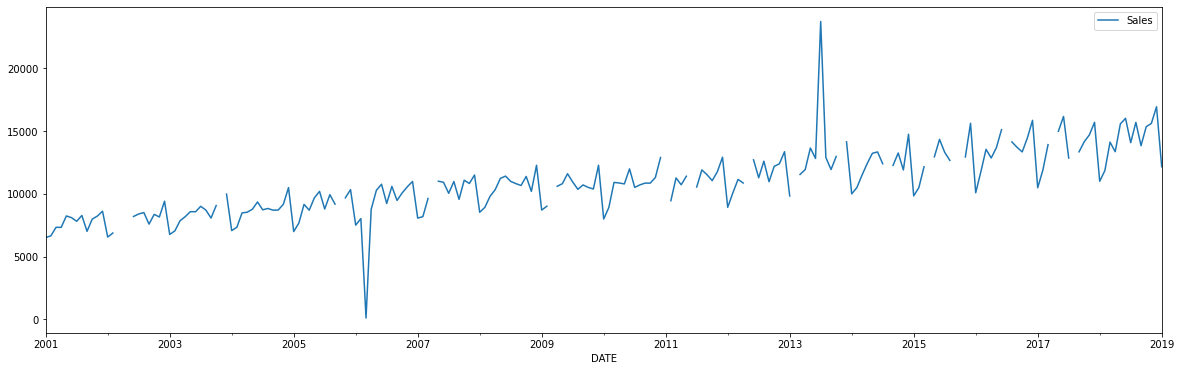

In [15]:
mobile_sales.plot()

In [18]:
mobile_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

### Imputation

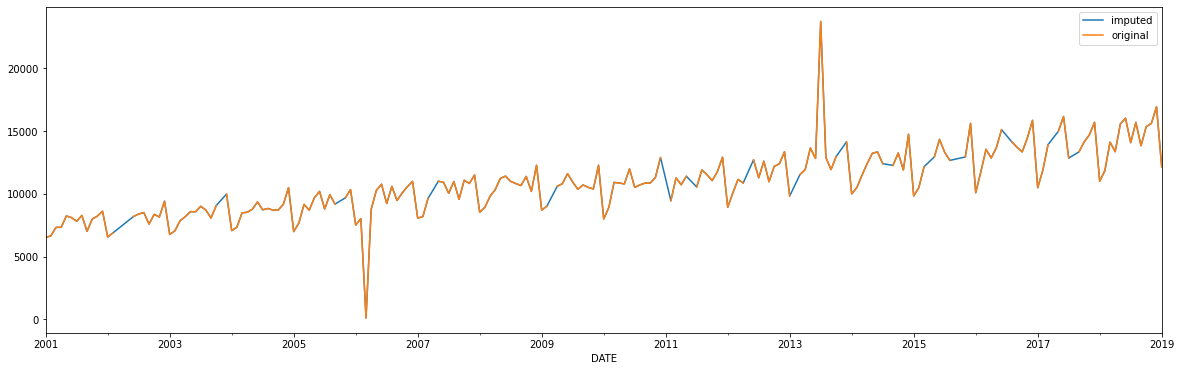

In [24]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [25]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

### Outliers

<AxesSubplot:>

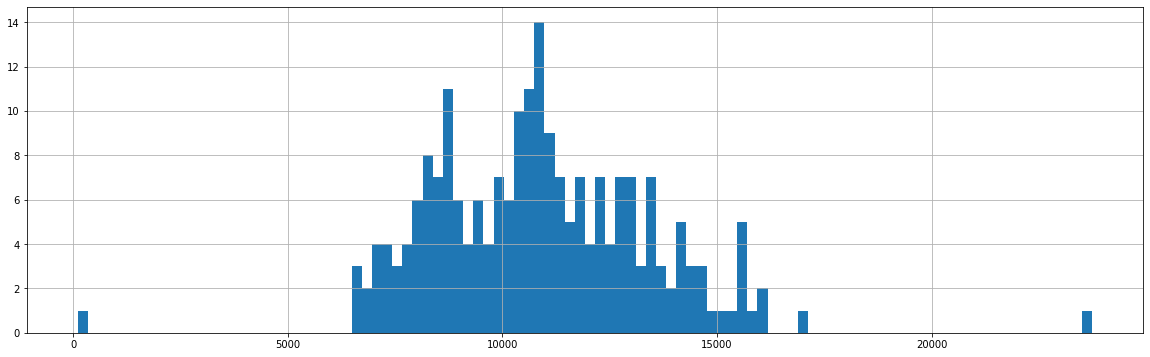

In [27]:
mobile_sales.Sales.hist(bins=100)

In [30]:
mobile_sales.Sales.quantile(0.99)

16144.480000000001

In [31]:
mobile_sales.Sales.quantile(0.01)

6573.36

In [37]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))

<AxesSubplot:xlabel='DATE'>

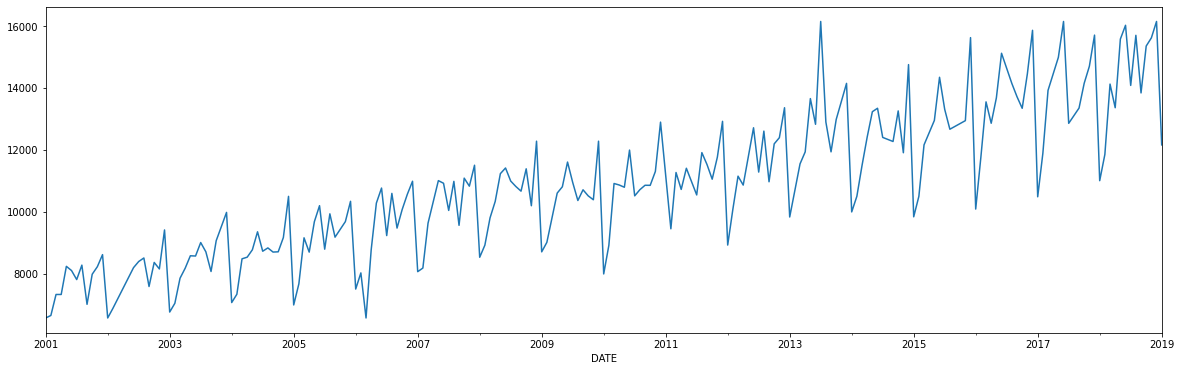

In [38]:
mobile_sales.Sales.plot()

### Clean

<AxesSubplot:xlabel='DATE'>

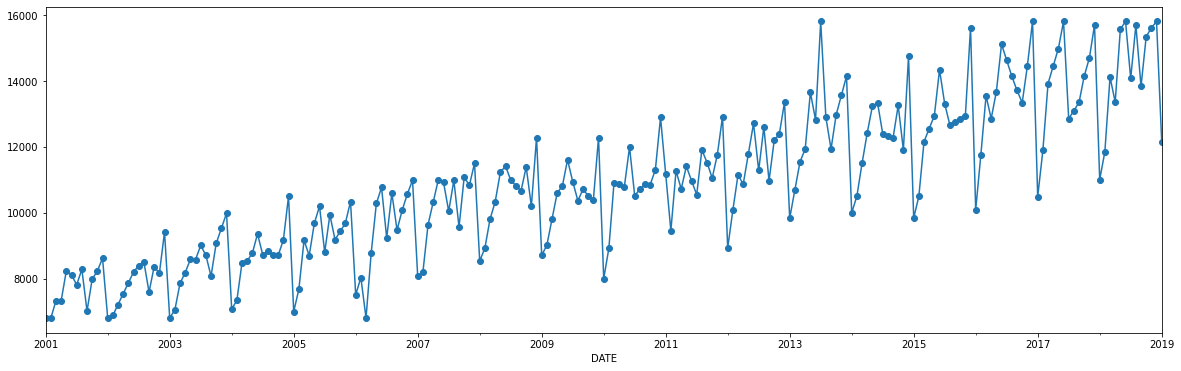

In [39]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.set_index('DATE', inplace=True)

# linear interpolation 
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

# anomalies - clip quantiles
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))

# plot
mobile_sales.Sales.plot(style='-o', figsize=(20,6))

<AxesSubplot:xlabel='DATE'>

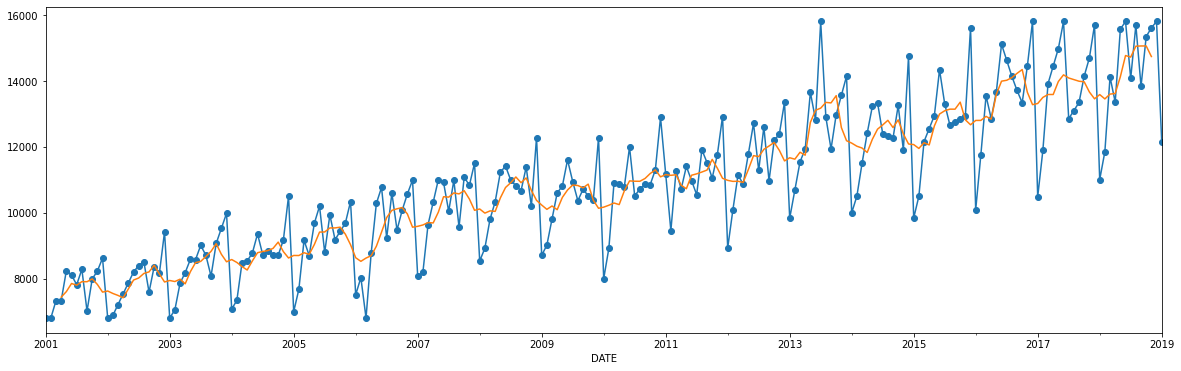

In [51]:
mobile_sales.Sales.plot(style='-o', figsize=(20,6))
mobile_sales.Sales.rolling(6, center=True).mean().plot(figsize=(20,6))

In [52]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

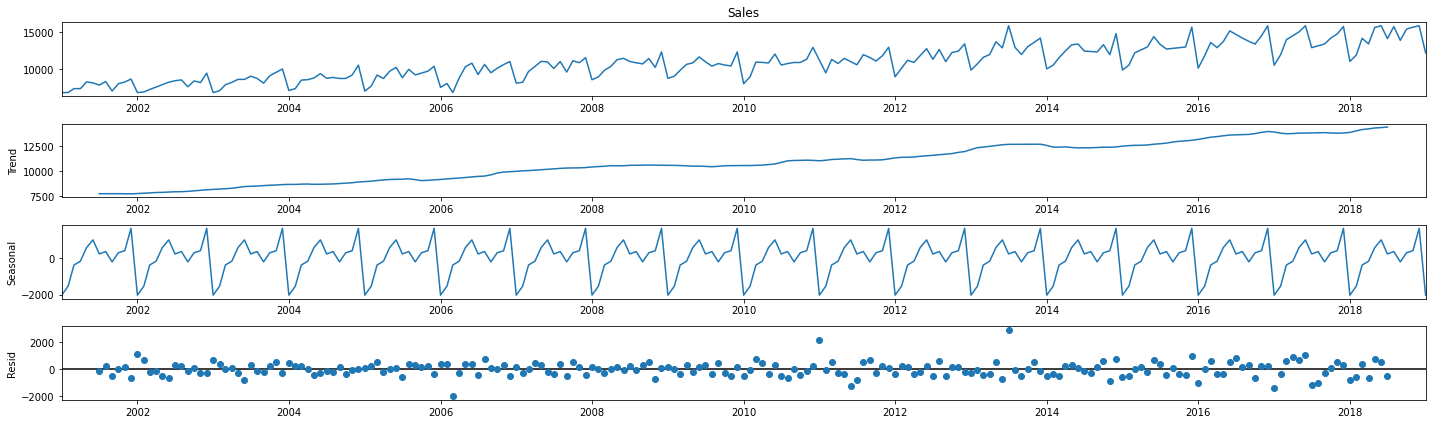

In [62]:
model.plot();

<AxesSubplot:xlabel='DATE'>

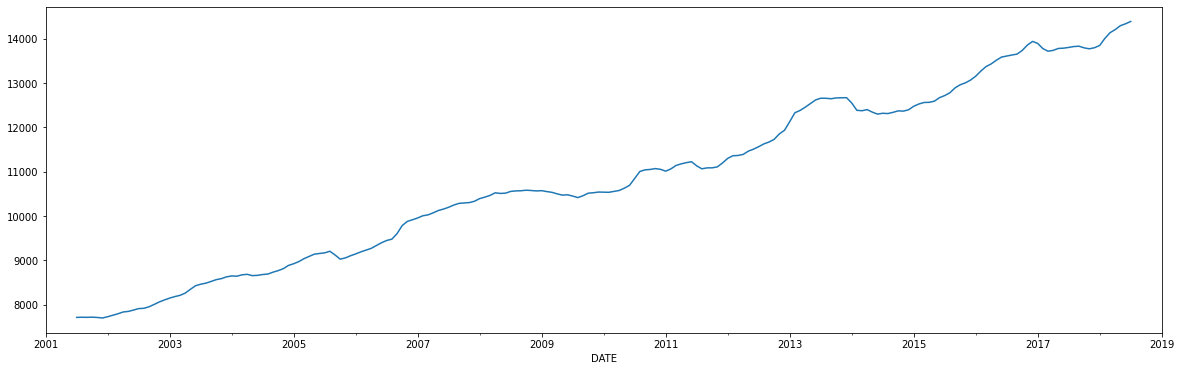

In [65]:
model.trend.plot()

<AxesSubplot:xlabel='DATE'>

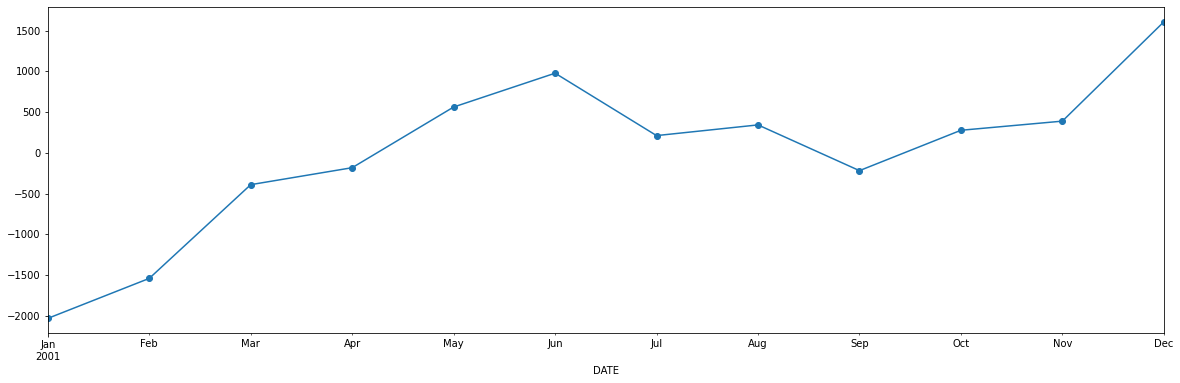

In [70]:
model.seasonal[:12].plot(style='-o')

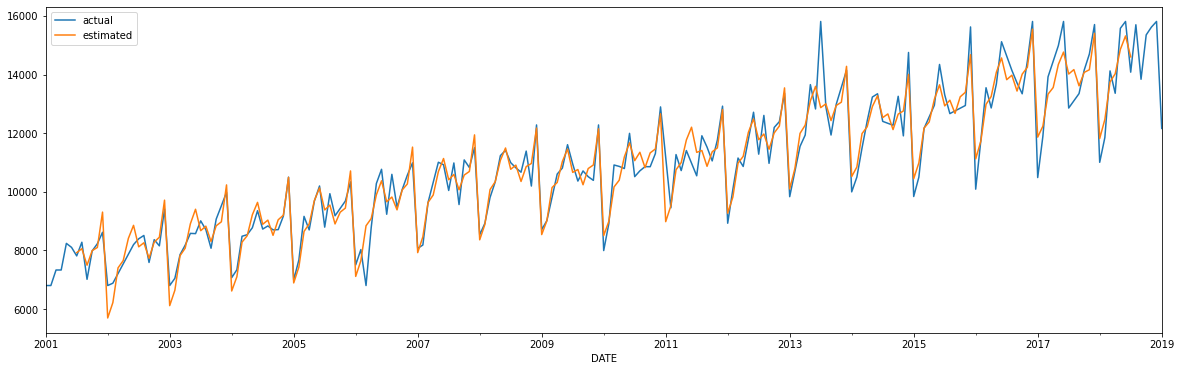

In [59]:
mobile_sales.Sales.plot(label='actual')
(model.trend + model.seasonal).plot(label='estimated')
plt.legend()

<AxesSubplot:xlabel='DATE'>

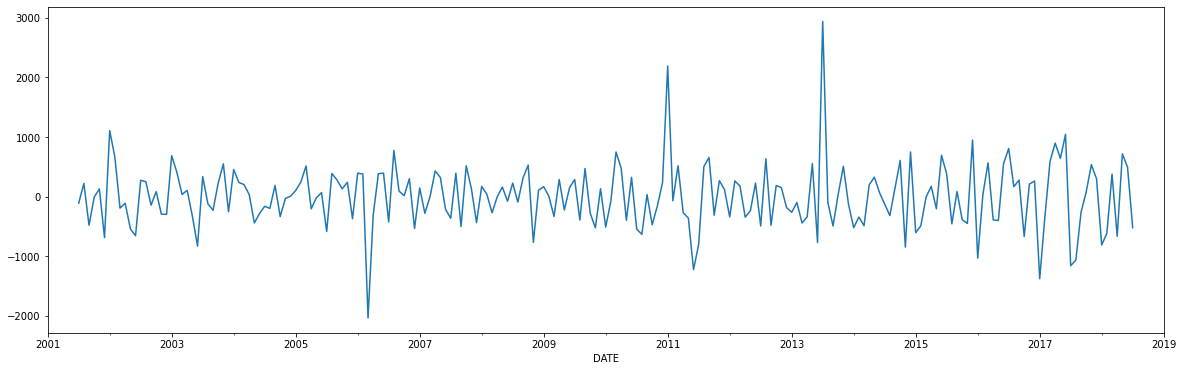

In [60]:
model.resid.plot()